In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
from prophet import Prophet
from sklearn.metrics import r2_score
import pickle

In [2]:
data = pd.read_csv('/content/drive/MyDrive/cac40.csv', parse_dates = True)

In [3]:
data.head()

,Date,Open,High,Low,Close,Turnover
0,03/01/2000,6024.38,6102.12,5901.77,5917.37,-
1,04/01/2000,5922.23,5925.07,5657.20,5672.02,-
2,05/01/2000,5521.83,5589.50,5461.59,5479.70,-
3,06/01/2000,5485.93,5530.26,5388.85,5450.11,-
4,07/01/2000,5423.88,5561.69,5423.88,5539.61,-


In [4]:
data.head()

,Date,Open,High,Low,Close,Turnover
0,03/01/2000,6024.38,6102.12,5901.77,5917.37,-
1,04/01/2000,5922.23,5925.07,5657.20,5672.02,-
2,05/01/2000,5521.83,5589.50,5461.59,5479.70,-
3,06/01/2000,5485.93,5530.26,5388.85,5450.11,-
4,07/01/2000,5423.88,5561.69,5423.88,5539.61,-


In [5]:
data_corr = data.corr()

<ipython-input-5-09b271be5fbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


<Axes: >

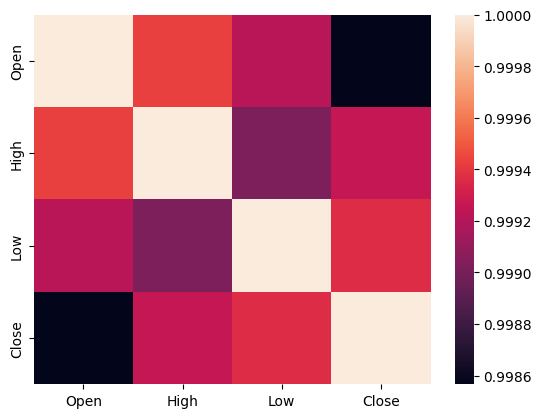

In [6]:
sns.heatmap(data_corr)

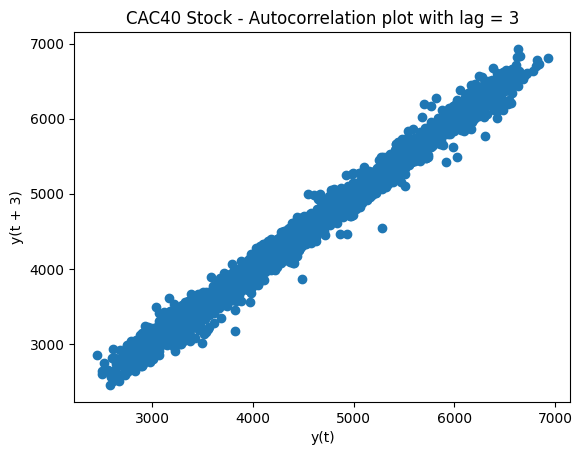

In [7]:
plt.figure()
lag_plot(data['Open'], lag=3)
plt.title('CAC40 Stock - Autocorrelation plot with lag = 3')
plt.show()

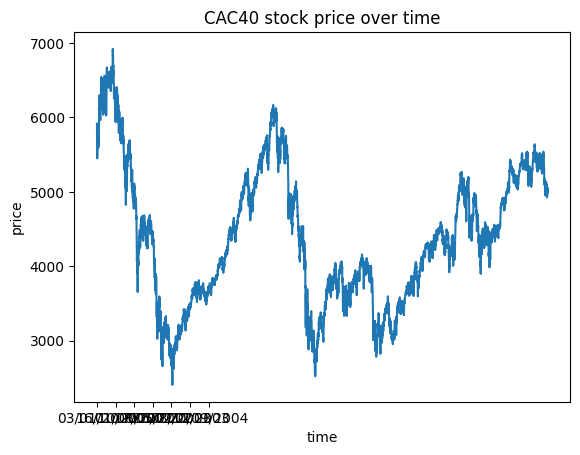

In [8]:
plt.plot(data["Date"], data["Close"])
plt.xticks(np.arange(0,1259, 200), data['Date'][0:1259:200])
plt.title("CAC40 stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [9]:
lens = data.shape[0]
end = int(0.8 * lens)
end

3872

In [10]:
train = data.iloc[:end]
test = data.iloc[end:]

In [11]:
train

,Date,Open,High,Low,Close,Turnover
0,03/01/2000,6024.38,6102.12,5901.77,5917.37,-
1,04/01/2000,5922.23,5925.07,5657.20,5672.02,-
2,05/01/2000,5521.83,5589.50,5461.59,5479.70,-
3,06/01/2000,5485.93,5530.26,5388.85,5450.11,-
4,07/01/2000,5423.88,5561.69,5423.88,5539.61,-
...,...,...,...,...,...,...
3867,17/02/2015,4720.93,4766.67,4683.19,4753.99,3509896125
3868,18/02/2015,4782.59,4806.68,4775.87,4799.03,4081249804
3869,19/02/2015,4788.40,4841.69,4770.17,4833.28,4161676152
3870,20/02/2015,4821.38,4837.93,4780.81,4830.90,5867868318


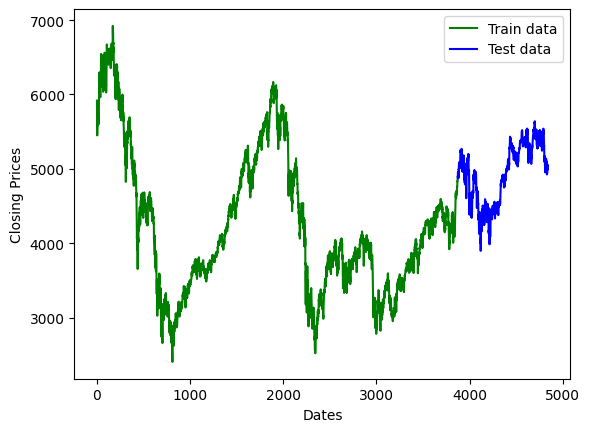

In [12]:
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train['Close'], 'green', label='Train data')
plt.plot(test['Close'], 'blue', label='Test data')
plt.legend()

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [14]:
stationarity(data['Close'])

Test Statistic: -2.1128559834484726
P-Value: 0.23937666710737104
Non-Stationary


In [15]:
data['First_Order_Difference'] = data['Close'] - data['Close'].shift(1)
data['Second_Order_Difference'] = data['First_Order_Difference'] - data['First_Order_Difference'].shift(1)

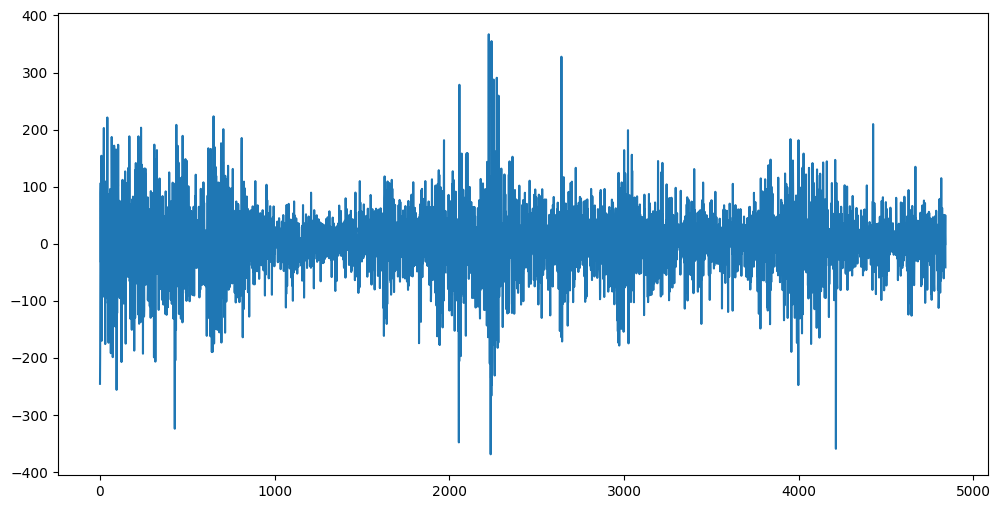

In [16]:
data['First_Order_Difference'].plot(figsize=(12, 6))
plt.show()

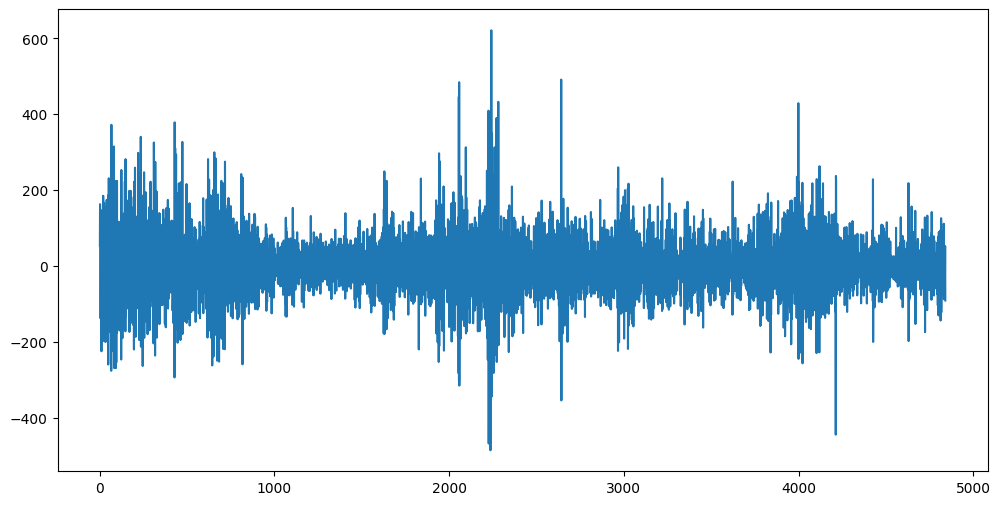

In [17]:
data['Second_Order_Difference'].plot(figsize=(12, 6))
plt.show()

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


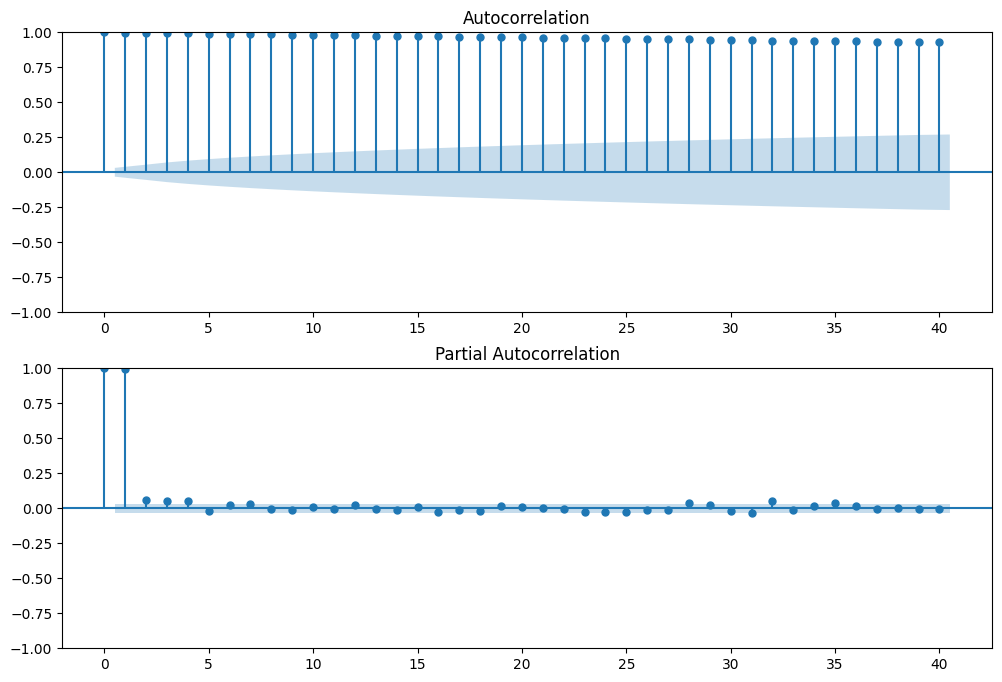

In [19]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Close'], lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Close'], lags=40, ax=ax2)

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
model = ARIMA(train['Close'], order=(5, 1, 0))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3872
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -21326.604
Date:                Wed, 24 May 2023   AIC                          42665.208
Time:                        05:59:48   BIC                          42702.776
Sample:                             0   HQIC                         42678.547
                               - 3872                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0412      0.012     -3.328      0.001      -0.066      -0.017
ar.L2         -0.0397      0.011     -3.564      0.000      -0.062      -0.018
ar.L3         -0.0483      0.011     -4.338      0.0

In [22]:
pred = model.forecast(steps=len(test))

In [23]:
history = [x for x in train['Close']]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model = model.fit()
    output = model.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test['Close'][t + 3872]
    history.append(obs)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(predictions, test['Close'])

0.9832169215456074

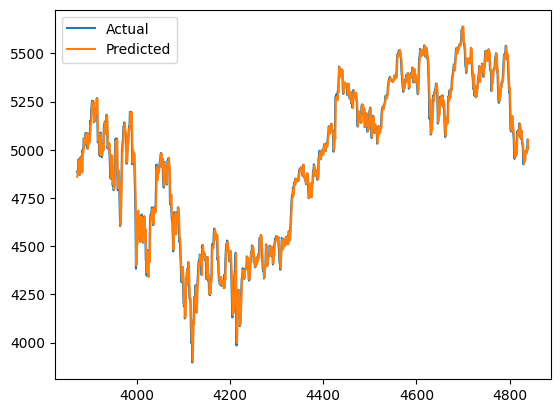

In [26]:
plt.plot(test['Close'], label="Actual")
plt.plot(test.index, predictions, label="Predicted")
plt.legend()

In [27]:
filename = 'model_pickle_cac40_arima.sav'
pickle.dump(model, open(filename, 'wb'))